<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#https://www.kaggle.com/code/francoisraucent/forecasting-electricity-consumption-of-germany

#https://towardsdatascience.com/forecasting-the-future-power-consumption-of-germany-using-lstm-rnn-and-dnn-d8e05e7fdc0a

#https://www.kaggle.com/code/ashfakyeafi/optimization-of-ev-charging

Mounted at /content/drive


In [ ]:
# import pandas as pd
# from pandas import DataFrame
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import legend
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.sequence import TimeseriesGenerator
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# import tensorflow as tf
# import datetime
# import numpy as np
# import seaborn as sns

# mpl.rcParams['figure.figsize'] = (10,8)
# mpl.rcParams['axes.grid'] = False

In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# Any results you write to the current directory are saved as output.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017.csv')

In [4]:
df

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2017-08-31T00:00:00,22:12,2017-08-31T00:00:00,23:11,18.2700,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2017-08-31T00:00:00,22:01,2017-08-31T00:00:00,22:31,19.4500,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,50575,2,2017-08-31T00:00:00,21:21,2017-08-31T00:00:00,21:59,19.7100,"South Inch Car Park, Perth",APT Triple Rapid Charger
3,4,51516,2,2017-08-31T00:00:00,20:43,2017-08-31T00:00:00,21:03,9.8400,Kinross Park and Ride,APT Triple Rapid Charger
4,5,50994,2,2017-08-31T00:00:00,19:50,2017-08-31T00:00:00,20:50,14.1700,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger
...,...,...,...,...,...,...,...,...,...,...
13671,13672,50745,2,2016-01-09T00:00:00,09:22,2016-01-09T00:00:00,09:37,3.5800,Kinross Park and Ride,APT Triple Rapid Charger
13672,13673,50281,1,2016-01-09T00:00:00,08:54,2016-01-09T00:00:00,16:37,10.3800,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet
13673,13674,50285,1,2016-01-09T00:00:00,08:22,2016-01-09T00:00:00,14:32,13.9300,Broxden Park & Ride,APT 22kW Dual Outlet
13674,13675,50281,2,2016-01-09T00:00:00,07:51,2016-01-09T00:00:00,09:01,3.8700,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet


In [5]:
# drop NA values
df = df.dropna()

In [6]:
# delete duplicate rows
df = df.drop_duplicates()

In [7]:
df['StartDateTime'] = pd.to_datetime(df['Start Date'].astype(str) + ' ' +df['Start Time'].astype(str))
df['EndDateTime'] = pd.to_datetime(df['End Date'].astype(str) + ' ' +df['End Time'].astype(str))

In [8]:
df

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model,StartDateTime,EndDateTime
0,1,51519,2,2017-08-31T00:00:00,22:12,2017-08-31T00:00:00,23:11,18.2700,"Broxden Park & Ride, Perth",APT Triple Rapid Charger,2017-08-31 22:12:00,2017-08-31 23:11:00
1,2,51250,1,2017-08-31T00:00:00,22:01,2017-08-31T00:00:00,22:31,19.4500,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger,2017-08-31 22:01:00,2017-08-31 22:31:00
2,3,50575,2,2017-08-31T00:00:00,21:21,2017-08-31T00:00:00,21:59,19.7100,"South Inch Car Park, Perth",APT Triple Rapid Charger,2017-08-31 21:21:00,2017-08-31 21:59:00
3,4,51516,2,2017-08-31T00:00:00,20:43,2017-08-31T00:00:00,21:03,9.8400,Kinross Park and Ride,APT Triple Rapid Charger,2017-08-31 20:43:00,2017-08-31 21:03:00
4,5,50994,2,2017-08-31T00:00:00,19:50,2017-08-31T00:00:00,20:50,14.1700,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,2017-08-31 19:50:00,2017-08-31 20:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...
13671,13672,50745,2,2016-01-09T00:00:00,09:22,2016-01-09T00:00:00,09:37,3.5800,Kinross Park and Ride,APT Triple Rapid Charger,2016-01-09 09:22:00,2016-01-09 09:37:00
13672,13673,50281,1,2016-01-09T00:00:00,08:54,2016-01-09T00:00:00,16:37,10.3800,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 08:54:00,2016-01-09 16:37:00
13673,13674,50285,1,2016-01-09T00:00:00,08:22,2016-01-09T00:00:00,14:32,13.9300,Broxden Park & Ride,APT 22kW Dual Outlet,2016-01-09 08:22:00,2016-01-09 14:32:00
13674,13675,50281,2,2016-01-09T00:00:00,07:51,2016-01-09T00:00:00,09:01,3.8700,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,2016-01-09 07:51:00,2016-01-09 09:01:00


In [9]:
df = df.drop(columns=['_id','CP ID','Connector','Start Date','Start Time','End Date','End Time','Site','Model'])
df=df[['StartDateTime','EndDateTime','Total kWh']]

In [10]:
df["StartDateTime"] = pd.to_datetime(df["StartDateTime"])

df = df.sort_values(by="StartDateTime")

In [11]:
df

,StartDateTime,EndDateTime,Total kWh
13675,2016-01-09 07:21:00,2016-01-09 07:27:00,2.0840
13674,2016-01-09 07:51:00,2016-01-09 09:01:00,3.8700
13673,2016-01-09 08:22:00,2016-01-09 14:32:00,13.9300
13672,2016-01-09 08:54:00,2016-01-09 16:37:00,10.3800
13671,2016-01-09 09:22:00,2016-01-09 09:37:00,3.5800
...,...,...,...
949,2017-12-08 19:51:00,2017-12-08 20:34:00,10.0970
948,2017-12-08 21:04:00,2017-12-08 21:27:00,13.0000
947,2017-12-08 22:11:00,2017-12-08 22:39:00,20.0100
946,2017-12-08 22:16:00,2017-12-08 22:55:00,19.7000


In [12]:
df = df.drop(columns="EndDateTime").set_index("StartDateTime")

In [13]:
df

,Total kWh
StartDateTime,
2016-01-09 07:21:00,2.0840
2016-01-09 07:51:00,3.8700
2016-01-09 08:22:00,13.9300
2016-01-09 08:54:00,10.3800
2016-01-09 09:22:00,3.5800
...,...
2017-12-08 19:51:00,10.0970
2017-12-08 21:04:00,13.0000
2017-12-08 22:11:00,20.0100


In [14]:
df.index = pd.to_datetime(df.index)

In [15]:
df.index.name = "Time"

In [16]:
df = df.groupby(pd.Grouper(freq="h")).mean()

In [18]:
df = df.fillna(df.median())

In [38]:
df = df.dropna()

In [39]:
df

,Total kWh
Time,
2016-01-09 07:00:00,2.9770
2016-01-09 08:00:00,12.1550
2016-01-09 09:00:00,3.5800
2016-01-09 10:00:00,7.1050
2016-01-09 11:00:00,21.7800
...,...
2017-12-08 19:00:00,7.7300
2017-12-08 20:00:00,9.7675
2017-12-08 21:00:00,13.0000


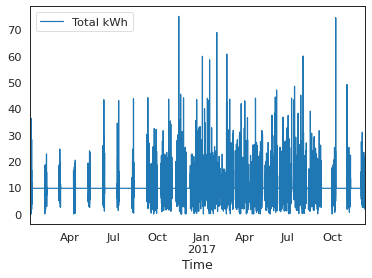

In [40]:
df.plot()

In [22]:
temp = df.copy() # make temporary copy of dataframe
#dataset = temp['total load actual'].dropna().values # numpy.ndarray of the actual load
#dataset = dataset.astype('float32') 
dataset = np.reshape(temp, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.80) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25 # timesteps to lookback for predictions
X_train, trainY = create_dataset(train, look_back)
X_test, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("Shapes: \nTraining set: {}, Testing set: {}".format(X_train.shape, X_test.shape))
print("Sample from training set: \n{}".format(X_train[0]))

Shapes: 
Training set: (13408, 1, 25), Testing set: (3333, 1, 25)
Sample from training set: 
[[0.03964787 0.16188104 0.04767866 0.09462483 0.29006739 0.05930089
  0.02823429 0.09091797 0.06574683 0.14604587 0.17768514 0.11994247
  0.1030818  0.13008417 0.13008417 0.13008417 0.13008417 0.13008417
  0.13008417 0.13008417 0.13008417 0.13008417 0.13008417 0.13008417
  0.13008417]]


In [23]:
# AutoRegressive
from statsmodels.tsa.ar_model import AR

model = AR(train)
model_fit = model.fit()

In [24]:
test_predict = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# invert predictions
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(test)
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

Test Mean Absolute Error: 1.5347807219291894
Test Root Mean Squared Error: 3.47237417275282


In [25]:
mape = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("Testing MAPE: {}".format(mape))

Testing MAPE: 329.7641912753682


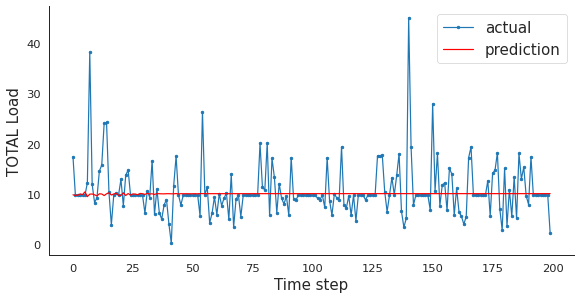

In [26]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

LSTM

In [30]:
# making data again to remove inconsistencies
temp1 = df
#dataset = temp['total load actual'].dropna().values #numpy.ndarray
#dataset = dataset.astype('float32')
dataset = np.reshape(temp1, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [32]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=50, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

Epoch 1/50
192/192 [==============================] - 5s 10ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 8/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/50
192/192 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.002

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 1.8791121340661268
Train Root Mean Squared Error: 3.5942287281816787
Test Mean Absolute Error: 1.8118933696866242
Test Root Mean Squared Error: 3.4557351969895636


In [34]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

Train MAPE: inf, Test MAPE: 346.06407909302163


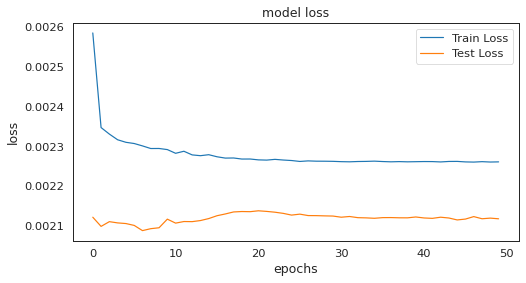

In [35]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

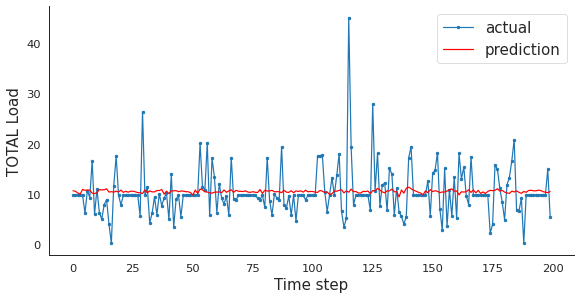

In [36]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();